In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r'F:\Ngoc Anh')

In [3]:
os.getcwd()

'F:\\Ngoc Anh'

In [ ]:
# 1) Validating and cleaning data

In [4]:
df = pd.read_csv('mkt_data.csv')

In [5]:
df

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
0,1,2019-04-12,59,46-60,SMS,2,0,received,0,0
1,2,2019-04-08,27,18-30,Email,2,0,received,0,0
2,3,2019-04-05,74,60+,Email,2,0,received,0,0
3,4,2019-04-21,32,31-45,SMS,2,0,received,0,0
4,5,2019-04-28,42,31-45,Email,2,0,received,0,0
...,...,...,...,...,...,...,...,...,...,...
299995,299996,2019-04-26,23,18-30,Email,2,0,received,0,0
299996,299997,2019-04-30,52,46-60,SMS,4,0,received,0,0
299997,299998,2019-04-22,20,18-30,SMS,2,0,received,0,0
299998,299999,2019-04-04,53,46-60,SMS,2,0,received,0,0


In [6]:
# Checking data integrity
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             300000 non-null  int64 
 1   send_date      300000 non-null  object
 2   estimated_age  300000 non-null  int64 
 3   age_range      300000 non-null  object
 4   channel        300000 non-null  object
 5   coupon         300000 non-null  int64 
 6   clicked        300000 non-null  int64 
 7   last_step      300000 non-null  object
 8   nb_units       300000 non-null  int64 
 9   order_value    300000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 22.9+ MB


In [7]:
# Check if any column has null value
df.isna().sum()

# => No columns contain null values

id               0
send_date        0
estimated_age    0
age_range        0
channel          0
coupon           0
clicked          0
last_step        0
nb_units         0
order_value      0
dtype: int64

In [8]:
# Drop columns "id" and "estimated_age"
df.drop('id', axis = 1, inplace = True)
df.drop('estimated_age', axis = 1, inplace = True)

In [9]:
df

,send_date,age_range,channel,coupon,clicked,last_step,nb_units,order_value
0,2019-04-12,46-60,SMS,2,0,received,0,0
1,2019-04-08,18-30,Email,2,0,received,0,0
2,2019-04-05,60+,Email,2,0,received,0,0
3,2019-04-21,31-45,SMS,2,0,received,0,0
4,2019-04-28,31-45,Email,2,0,received,0,0
...,...,...,...,...,...,...,...,...
299995,2019-04-26,18-30,Email,2,0,received,0,0
299996,2019-04-30,46-60,SMS,4,0,received,0,0
299997,2019-04-22,18-30,SMS,2,0,received,0,0
299998,2019-04-04,46-60,SMS,2,0,received,0,0


In [10]:
# Data description
df.describe()

,coupon,clicked,nb_units,order_value
count,300000.00000,300000.000000,300000.000000,300000.000000
mean,3.09778,0.059220,0.010450,0.386213
std,1.47778,0.236036,0.263529,10.305920
min,2.00000,0.000000,0.000000,0.000000
25%,2.00000,0.000000,0.000000,0.000000
50%,2.00000,0.000000,0.000000,0.000000
75%,4.00000,0.000000,0.000000,0.000000
max,6.00000,1.000000,100.000000,3994.000000


In [16]:
# 2) Descriptive Statistics & Exploratory Analysis

In [11]:
# Number of customers in each age group
age_1 = len(df[df['age_range'] == '18-30'])
age_2 = len(df[df['age_range'] == '31-45'])
age_3 = len(df[df['age_range'] == '46-60'])
age_4 = len(df[df['age_range'] == '60+'])
[age_1, age_2, age_3, age_4]

[102107, 122900, 50893, 24100]

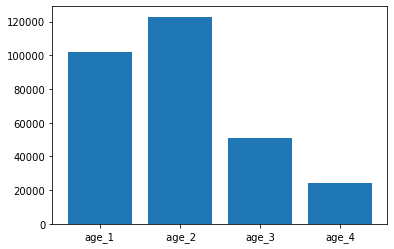

In [12]:
x = np.array(['age_1',' age_2', 'age_3', 'age_4'])
y = np.array([102107, 122900, 50893, 24100])
plt.bar(x,y)
plt.show()

# => The highest number of customers receiving SMS/Email are in the age range 31-45

In [13]:
# Number of SMS/Emails sent
sms = len(df[df['channel'] == 'SMS'])
email = len(df[df['channel'] == 'Email'])
[sms, email]

[163511, 136489]

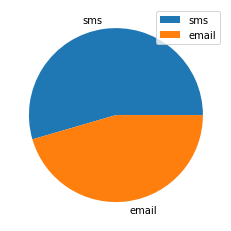

In [14]:
x = np.array(['sms', 'email'])
y = np.array([163511, 136489])
plt.pie(y, labels = x)
plt.legend()
plt.show()

In [15]:
# Number of coupons issued for each value of the coupon
cp2 = len(df[df['coupon'] == 2])
cp4 = len(df[df['coupon'] == 4])
cp6 = len(df[df['coupon'] == 6])
[cp2, cp4, cp6]

[180085, 75163, 44752]

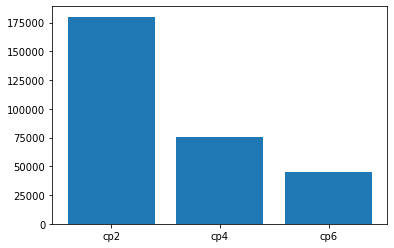

In [16]:
x = np.array(['cp2','cp4','cp6'])
y = np.array([180085,75163,44752])
plt.bar(x,y)
plt.show()

In [ ]:
# 3) Statistical analysis to answer the questions

In [ ]:
# a) Question: For the next quarter, your marketing department has a budget of $60,000 to spend on online campaigns. 
# How would you allocate it between SMS and Email?

# => We need to allocate budget for online marketing campaign between SMS and Email
# => Analyze the effectiveness between SMS and Email channels

In [ ]:
# First, we consider the effect of coupon value on customers behavior

In [17]:
# What value of the coupon makes customers click on the link in SMS/Email?
pv_coupon = pd.pivot_table(df, index = 'coupon', values = 'clicked', aggfunc = np.mean)
pv_coupon

,clicked
coupon,
2,0.055218
4,0.061892
6,0.070835


In [ ]:
# => The value of the coupon has an effect on link clicks, but the effect is relatively small 

In [18]:
# Possibility to click on the link of each age and value of the coupon
pv_cp_age = pd.pivot_table(df, index = ['age_range', 'coupon'], values = 'clicked', aggfunc = np.mean)
pv_cp_age

clicked
age_range coupon          
18-30     2       0.054339
          4       0.064071
          6       0.081222
31-45     2       0.065861
          4       0.060913
          6       0.056952
46-60     2       0.047248
          4       0.077140
          6       0.110264
60+       2       0.021525
          4       0.025797
          6       0.014021

In [23]:
# => We see that, for the age group of 18-30 and 46-60, the value of the coupon has an effect on the likelihood 
# of clicking the link, especially for group 46-60, these people are middle-aged and interested in product promotions

In [19]:
# Consider the effect of coupon value on customers buying behavior
pv_age_purchase_cp = pd.pivot_table(df, index = ['age_range', 'coupon'], values = ['nb_units', 'order_value'], aggfunc = np.sum)
pv_age_purchase_cp

nb_units  order_value
age_range coupon                       
18-30     2            686        26262
          4            331        11916
          6            175         5950
31-45     2            784        29906
          4            276         9936
          6            174         5916
46-60     2            306        11682
          4            225         8208
          6            164         5576
60+       2              5          190
          4              8          288
          6              1           34

In [20]:
pv_cp_purchase = pd.pivot_table(df, index = 'coupon', values = ['nb_units', 'order_value'], aggfunc = np.sum)
pv_cp_purchase

,nb_units,order_value
coupon,,
2,1781,68040
4,840,30348
6,514,17476


In [ ]:
# => The value of the coupon does not affect the number of products purchased and the order value of age groups

In [ ]:
# => We realize that the value of the coupon does affect the customers' awareness of our product but not the customers buying behavior.

In [ ]:
# Next, we will consider the budget allocation between two advertising channels: SMS and Email

In [21]:
# The possibility to click on the link of each age
pv_age = pd.pivot_table(df, index = 'age_range', values = 'clicked', aggfunc = np.mean)
pv_age

,clicked
age_range,
18-30,0.060770
31-45,0.063287
46-60,0.064154
60+,0.021494


In [ ]:
# => People who are least likely to click on a link are 60+ years old,
# this age group is the elderly group, often not interested in discount programs

In [22]:
# The possibility to click on the link of each age by channels
pv_channel_age = pd.pivot_table(df, index = ['age_range', 'channel'], values = 'clicked', aggfunc = np.mean)
pv_channel_age

clicked
age_range channel          
18-30     Email    0.048157
          SMS      0.071383
31-45     Email    0.076432
          SMS      0.052328
46-60     Email    0.043259
          SMS      0.081385
60+       Email    0.017446
          SMS      0.024863

In [ ]:
# => Age group 18-30, 46-60 and 60+ often click on links in SMS more than in Email, 
# especially the two age groups 18-30 and 46-60
# The age group 31-45 often clicks on links in Email more

In [23]:
# Total order quantity and order value by each age
pv_age_purchase = pd.pivot_table(df, index = 'age_range', values = ['nb_units', 'order_value'], aggfunc = np.sum)
pv_age_purchase

,nb_units,order_value
age_range,,
18-30,1192,44128
31-45,1234,45758
46-60,695,25466
60+,14,512


In [ ]:
# => The 18-30 and 31-45 age groups have a much higher demand for products than the other two age groups
# The age group 60+ has little demand to buy new generation razor products

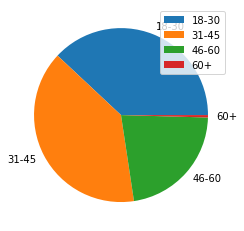

In [24]:
x = np.array(['18-30', '31-45', '46-60', '60+'])
y = np.array([1192, 1234, 695, 14])
plt.pie(y, labels = x)
plt.legend()
plt.show()

In [25]:
# Number of products purchased and Total order value by each SMS/Email channel
pv_units_order = pd.pivot_table(df, index = 'channel', values = ['nb_units', 'order_value'], aggfunc = np.sum)
pv_units_order

,nb_units,order_value
channel,,
Email,1473,54324
SMS,1662,61540


In [26]:
# Number of products purchased and Total order value by each age group and SMS/Email channel
channel_age_nb_order = pd.pivot_table(df, index = ['age_range', 'channel'], values = ['nb_units', 'order_value'], aggfunc = np.sum)
channel_age_nb_order

nb_units  order_value
age_range channel                       
18-30     Email         422        15504
          SMS           770        28624
31-45     Email         877        32474
          SMS           357        13284
46-60     Email         170         6204
          SMS           525        19262
60+       Email           4          142
          SMS            10          370

In [27]:
# Filter out people who have purchased
df_purchased = df[df['nb_units'] != 0]
df_purchased

,send_date,age_range,channel,coupon,clicked,last_step,nb_units,order_value
70,2019-04-25,18-30,Email,2,1,purchased,1,38
116,2019-05-01,31-45,Email,2,1,purchased,3,114
531,2019-04-14,18-30,Email,4,1,purchased,2,72
658,2019-04-03,46-60,SMS,2,1,purchased,30,1194
664,2019-04-01,31-45,Email,4,1,purchased,1,36
...,...,...,...,...,...,...,...,...
299608,2019-04-24,31-45,Email,4,1,purchased,2,72
299621,2019-04-24,18-30,SMS,2,1,purchased,1,38
299626,2019-04-30,18-30,Email,2,1,purchased,2,76
299750,2019-04-07,31-45,Email,4,1,purchased,1,36


In [28]:
df_purchased = df_purchased.reset_index(drop = True)
df_purchased

,send_date,age_range,channel,coupon,clicked,last_step,nb_units,order_value
0,2019-04-25,18-30,Email,2,1,purchased,1,38
1,2019-05-01,31-45,Email,2,1,purchased,3,114
2,2019-04-14,18-30,Email,4,1,purchased,2,72
3,2019-04-03,46-60,SMS,2,1,purchased,30,1194
4,2019-04-01,31-45,Email,4,1,purchased,1,36
...,...,...,...,...,...,...,...,...
1857,2019-04-24,31-45,Email,4,1,purchased,2,72
1858,2019-04-24,18-30,SMS,2,1,purchased,1,38
1859,2019-04-30,18-30,Email,2,1,purchased,2,76
1860,2019-04-07,31-45,Email,4,1,purchased,1,36


In [29]:
# Add column "net_profit" to dataframe df_purchased
nprofit = []
for i in range(len(df_purchased)):
    if df_purchased['channel'][i] == 'SMS':
        nprofit.append(df_purchased['order_value'][i] - 18 - 0.05)
    else:
        nprofit.append(df_purchased['order_value'][i] - 18 - 0.075)

df_purchased['net_profit'] = nprofit
df_purchased

,send_date,age_range,channel,coupon,clicked,last_step,nb_units,order_value,net_profit
0,2019-04-25,18-30,Email,2,1,purchased,1,38,19.925
1,2019-05-01,31-45,Email,2,1,purchased,3,114,95.925
2,2019-04-14,18-30,Email,4,1,purchased,2,72,53.925
3,2019-04-03,46-60,SMS,2,1,purchased,30,1194,1175.950
4,2019-04-01,31-45,Email,4,1,purchased,1,36,17.925
...,...,...,...,...,...,...,...,...,...
1857,2019-04-24,31-45,Email,4,1,purchased,2,72,53.925
1858,2019-04-24,18-30,SMS,2,1,purchased,1,38,19.950
1859,2019-04-30,18-30,Email,2,1,purchased,2,76,57.925
1860,2019-04-07,31-45,Email,4,1,purchased,1,36,17.925


In [30]:
# Total net profit by channel
net_profit_by_channel = pd.pivot_table(df_purchased, index = 'channel', values = 'net_profit', aggfunc = np.sum)
net_profit_by_channel

,net_profit
channel,
Email,37188.9
SMS,45042.3


In [31]:
# Percentage of net profit by channel
nf_per_sms = 45042.3/(37188.9+45042.3) * 100
nf_per_email = 100 - nf_per_sms
[nf_per_sms, nf_per_email]

[54.77519481656598, 45.22480518343402]

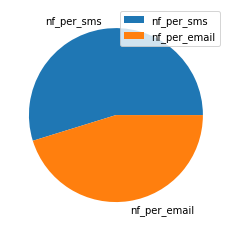

In [32]:
x = np.array(['nf_per_sms', 'nf_per_email'])
y = np.array([54.77519481656598, 45.22480518343402])
plt.pie(y, labels = x)
plt.legend()
plt.show()

In [33]:
# Number of SMS/Emails sent
sms = len(df[df['channel'] == 'SMS'])
email = len(df[df['channel'] == 'Email'])
[sms, email]

[163511, 136489]

In [34]:
# Calculate ROI (Return On Investment) 
# (percentage of net profit on total investment cost for the online campaign [SMS/Email])

# ROI_SMS = (sum(net_profit_sms)/(0.05*163511) * 100
# ROI_Email = (sum(net_profit_email)/(0.075*136489) * 100

ROI_SMS = 45042.3/(0.05*163511) * 100
ROI_Email = 37188.9/(0.075*136489) * 100
[ROI_SMS, ROI_Email]

[550.9390805511556, 363.2908146444036]

In [ ]:
# Meaningful:
# + For every 1$ spent on SMS advertising, the company earns a net profit of about 5.51$
# + For every 1$ spent on Email advertising, the company earns a net profit of about 3.63$

In [ ]:
# Conclusion: 
# + From the above results, we see that SMS advertising brings more value to the company
# + Percentage of net profit by channel: nf_per_sms = 54.78%, nf_per_email = 45.22%

In [35]:
# ---> Allocate 60000$ for two SMS and Email channels:

sms_budget = 60000 * 0.5478
email_budget = 60000 - sms_budget

In [36]:
sms_budget

32868.0

In [37]:
email_budget

27132.0

In [38]:
pv_units_order

,nb_units,order_value
channel,,
Email,1473,54324
SMS,1662,61540


In [39]:
bb = pd.pivot_table(df, index = ['channel', 'age_range'], values = 'nb_units', aggfunc = np.sum)
bb

nb_units
channel age_range          
Email   18-30           422
        31-45           877
        46-60           170
        60+               4
SMS     18-30           770
        31-45           357
        46-60           525
        60+              10

In [ ]:
# ---> Allocate the budget to each channel SMS/Email for each age group

In [40]:
# SMS
s_18_30 = 32868*(770/1662)
s_31_45 = 32868*(357/1662)
s_46_60 = 32868*(525/1662)
s_over60 = 32868 - s_18_30 - s_31_45 - s_46_60
[s_18_30, s_31_45, s_46_60, s_over60]

[15227.653429602888, 7060.093862815885, 10382.490974729242, 197.76173285198638]

In [41]:
# Email
e_18_30 = 27132*(422/1473)
e_31_45 = 27132*(877/1473)
e_46_60 = 27132*(170/1473)
e_over60 = 27132 - e_18_30 - e_31_45 - e_46_60
[e_18_30, e_31_45, e_46_60, e_over60]

[7773.050916496945, 16153.94704684318, 3131.3238289205706, 73.67820773930589]

In [42]:
# Allocation Table:

allocation_table = [['SMS', '18-30', 15228], ['SMS', '31-45', 7060], ['SMS', '46-60', 10382], ['SMS', '60+', 198], ['Email', '18-30', 7773], ['Email', '31-45', 16154], ['Email', '46-60', 3131], ['Email', '60+', 74]]
pd.DataFrame(allocation_table, columns = ['channel', 'age_range', 'budget ($)'])

,channel,age_range,budget ($)
0,SMS,18-30,15228
1,SMS,31-45,7060
2,SMS,46-60,10382
3,SMS,60+,198
4,Email,18-30,7773
5,Email,31-45,16154
6,Email,46-60,3131
7,Email,60+,74


In [ ]:
# b) Question: Now assume that you are also responsible for the operation of the company’s website. 
# Do you have any comments or suggestions so that we can improve the website’s performance in order to maximize net profit?


# => We need to find out how customers abandons the website and the reason for it
# => Analyze what actions customers usually take before leaving the website, find the cause and provide solutions

In [51]:
# Customers' action before they leave the website
received = len(df[df['last_step'] == 'received'])
bounced = len(df[df['last_step'] == 'bounced'])
saw_review = len(df[df['last_step'] == 'saw review'])
added_to_cart = len(df[df['last_step'] == 'added to cart'])
payment_page = len(df[df['last_step'] == 'payment page'])
purchased = len(df[df['last_step'] == 'purchased'])
[received, bounced, saw_review, added_to_cart, payment_page, purchased]

[282234, 6950, 5252, 2753, 949, 1862]

In [52]:
# First, calculate the Conversion Rate
# Conversion Rate = The ratio of shoppers to the total number of people who clicked on the link leading to the website
# = purchased/(bounced + saw review + added to cart + payment + purchased)

conversion_rate = 1862/(6950+5252+2753+949+1862) * 100
conversion_rate

10.480693459416864

In [ ]:
# => Website conversion rate is about 10.5%, this is a low rate

# => We need to measure the performance of the website

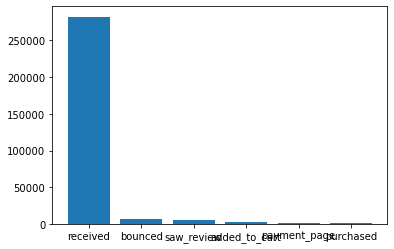

In [53]:
x = np.array(['received', 'bounced', 'saw_review', 'added_to_cart', 'payment_page', 'purchased'])
y = np.array([282234, 6950, 5252, 2753, 949, 1862])
plt.bar(x,y)
plt.show()

In [ ]:
# => Most SMS/Email were sent but not clicked

# Some reasons why most customers don't click and solutions:
# + SMS/Email may be pushed to spam folder 
# + External content and headlines are not attract users, which makes them ignore our SMS/Email 
# ---> Adjusted the title and appearance of the SMS/Email that arouse the curiosity of the user

In [54]:
# Bounce rate to total website clicks
# This is an important metric, used to determine if a website is performing well
# bounce_rate = bounced/(bounced + saw review + added to cart + payment page + purchased)

bounce_rate = 6950/(6950+5252+2753+949+1862) * 100
bounce_rate

39.11966677924125

In [ ]:
# => Bounce rate is very high, here are some reasons:
# + The content on the website is not attractive
# + Website UX/UI is not friendly to users
# + The landing page doesn't have what visitors expect when they arrive
# + Customers are not interested in the product

In [55]:
# The ratio of people who dropped out of the payment to the total number of people who added to the cart
# = payment/(added to cart + payment)

drop_pay = 949/(2753+949) * 100
drop_pay

25.634792004321987

In [ ]:
# => This ratio is high. Customers dropping out of the payment can be due to the following reasons:
# + Complicated online payment process.
# + Unable to cause reliability when customers enter payment information, customers are concerned about payment security. 
# ---> Need to build a website security system to ensure that customer information will be secure.
# + Information about Shipping Policy and Return Policy is not clear.
# ---> There should be a clear Shipping Policy and Return Policy, ensuring the right of customers.

In [ ]:
# 4) Conclusion

In [ ]:
# The value of the coupon does affect the customers' awareness of our product but not the customers buying behavior
# Age group 18-30, 46-60 and 60+ often click on links in SMS more than in Email, the age group 31-45 often clicks on links in Email more
# The 18-30 and 31-45 age groups have a much higher demand for products than the other two age groups
# SMS advertising brings more value to the company

# Most SMS/Email were sent but not clicked
# The conversion rate of the website is quite low (~10.5%)
# Bounce rate is very high (~39%)
# The ratio of people who dropped out of the payment (~25.6%)

In [ ]:
# Suggestions and recommendations for website:

# + Company needs to upgrade and improve the content on the website.
# + Adjusted the title and appearance of the SMS/Email that arouse the curiosity of the user.
# + Build a website security system to ensure that customer information will be secure.
# + Clear Shipping Policy and Return Policy, ensuring the right of customers.